In [1]:
# Seaborn is a statistical plotting library which is built on top of matplotlib. Seaborn is used for all the statistical
# ploting mostly like bar graph, pie chart, heat map etc.

# In order to install seaborn we can use :
# pip install seaborn for all python distributions and conda install seaborn for conda distribution

# OPEN THE TERMINAL AND SHOW

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
# seaborn has many default pandas libraries we can use for our referencs:

tips= sns.load_dataset('tips')

In [5]:
# tips basically the dataset which says the tips given by the people in restaurants

In [6]:
# Let's check out the dataset

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# now let's check the first poloting named dis plot
# dist plot basically tells us the distribution of a specific feature means it shows a graphical representation of the 
# feature or column and how it is distributed from start to end

D:\Anaconda3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

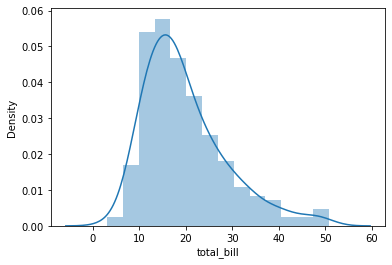

In [8]:
# Let's check out the 'totla_bill' column

sns.distplot(tips['total_bill'])

D:\Anaconda3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

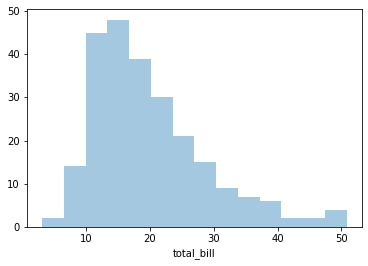

In [9]:
# notice here we have histogram and a curve showing the shape of the histogram. The curve is called as KDE
# which we will discuss later in this lecture

# so now let's just make the kde as false

sns.distplot(tips['total_bill'], kde=False)

In [10]:
# here we can see the number of people in y axis and total_bill in x-axis, so we can say that the maximum total_bills lie
# between 10-20 dollars

<AxesSubplot:xlabel='total_bill'>

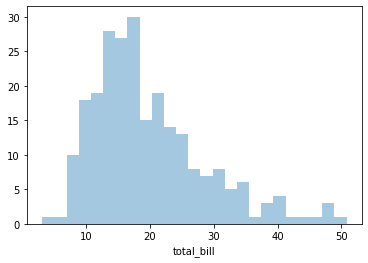

In [11]:
# we can change the number of bins of hists to have a more clearer view

sns.distplot(tips['total_bill'], kde=False, bins=25)

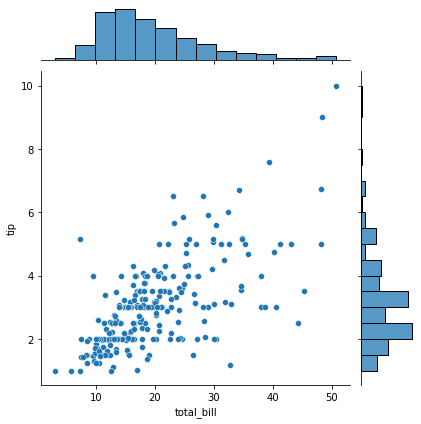

In [12]:
# Now let's discuss about a plot which works well for bi-variate.
sns.jointplot(x='total_bill',y='tip',data=tips) # here it takes x,y arguments as the column names of dataframe we want 
# to compare and then data as the dataframe name

In [13]:
# so here we can see the histogram for tip in y-axis and total_bill in x-axis

# we also have a scatter plot which tells the relationship between tip and total_bill

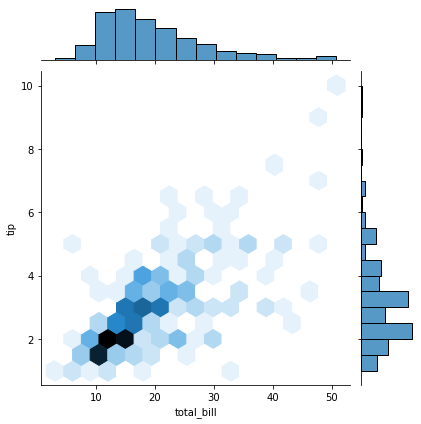

In [14]:
# jointplot has one more important aspect as kind which says that which type of graph we want for comparision

# so here it is scatter plot by default we can change it if we want like:

sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

In [15]:
# so here we have the comarision graph as hexagon

In [16]:
# now let's discuss about pairplot
# so pairplot is used to provide us pair wise relationship between numerical columns

In [17]:
# pairplot will show the all possible pair wise comparison between all the columns we have in the dataframe
# so pair wise is used to identify how similar is one group of data with another

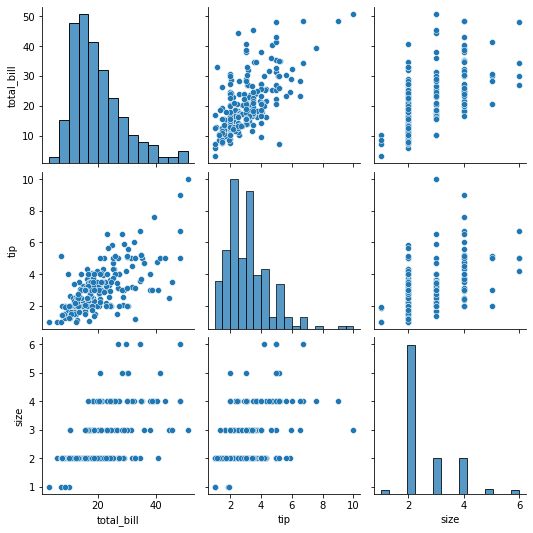

In [18]:
sns.pairplot(tips)

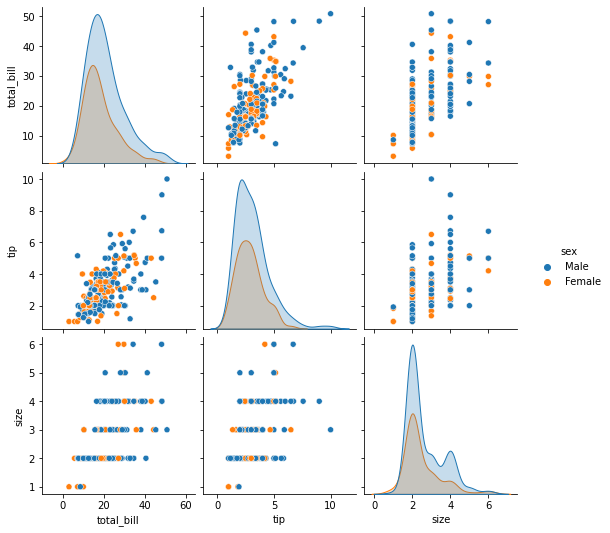

In [19]:
# we can also add the categorical column using the argument called as hue

sns.pairplot(tips,hue='sex')

In [20]:
# so here all the blue points are male and orange points are female

# also notice that here we are having total_bill, tip and size are the variables in both x and y axis

<AxesSubplot:xlabel='total_bill'>

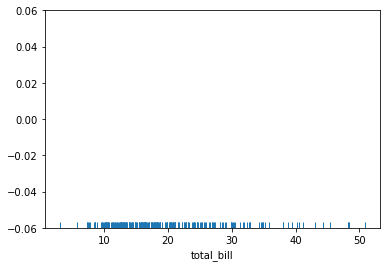

In [21]:
# Now let's discuss about rug plot

# So rug plot is also used in univariate series

sns.rugplot(tips['total_bill'])

In [22]:
# so here it tries to get a line for each entry of the column

In [23]:
# Now let's discuss about KDE plot or kernel density estimation plot

In [24]:
# so based on the rug plots we draw the normal distributions of the data points and then we join all the normal distributions
# to get the KDE plot

D:\Anaconda3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

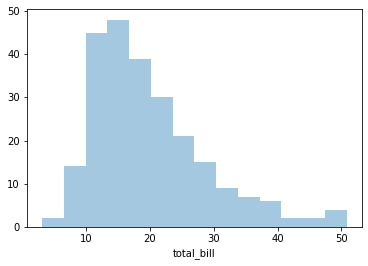

In [25]:
# What I mean by that is: 

sns.distplot(tips['total_bill'], kde=False) # we have this distplot with us

In [26]:
# now notice that for each bins the normal distribution is different
# let's create them with some bunch of codes

(0.0, 1.0)

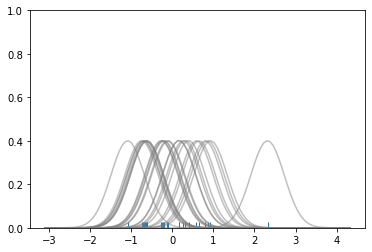

In [27]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [28]:
# now let's sum up all to get the KDE plot

Text(0.5, 0.98, 'Sum of the Basis Functions')

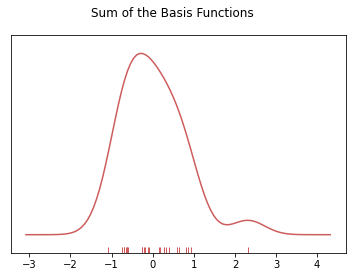

In [29]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='sex', ylabel='tip'>

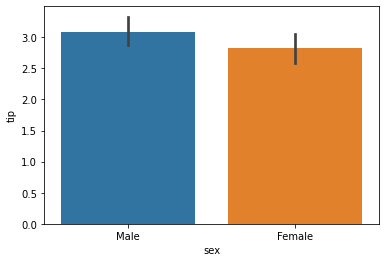

In [30]:
# now let's discuss about bar plot

# bar plot can be called as the ploting related to group by

sns.barplot(x='sex',y='tip',data=tips) # it will show the average value for the groups based on the gender as male and female

<AxesSubplot:xlabel='sex', ylabel='tip'>

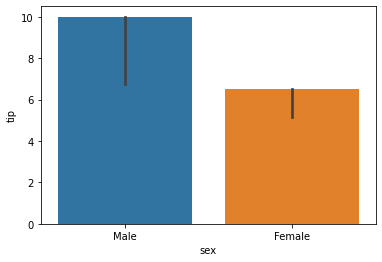

In [31]:
# by default the estimator here is mean that is the data is calculated based on the mean to plot the graph
# we can go ahead and change it if we want

sns.barplot(x='sex',y='tip',data=tips,estimator=np.max)

In [32]:
# now it is showing the maximum tips paid by male and female

In [33]:
# we can be able to find the count of a categorical series or a column by using count plot

<AxesSubplot:xlabel='sex', ylabel='count'>

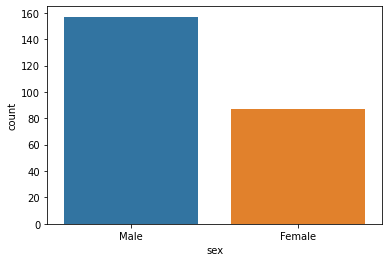

In [34]:
sns.countplot(x='sex',data=tips)

In [35]:
# now let's discuss about box plot

In [36]:
# it is used to show the distribution of categorical data

<AxesSubplot:xlabel='day', ylabel='tip'>

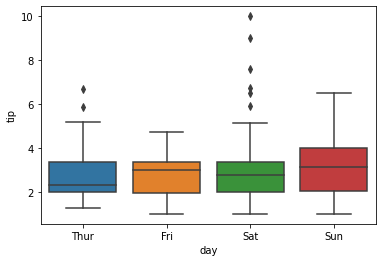

In [37]:
# now let's draw one

sns.boxplot(x='day',y='tip',data=tips)

In [38]:
# So this box plot shows the quartiles of the data and the whiskers show the extension of the data

<AxesSubplot:xlabel='day', ylabel='tip'>

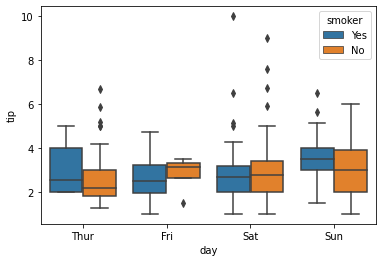

In [39]:
# we can also add one more extra category in the box plot using the argument hue

sns.boxplot(x='day',y='tip',data=tips,hue='smoker')

In [40]:
# now let's discuss about a violin plot

# a violin plot is almost similar like a box plot

<AxesSubplot:xlabel='sex', ylabel='tip'>

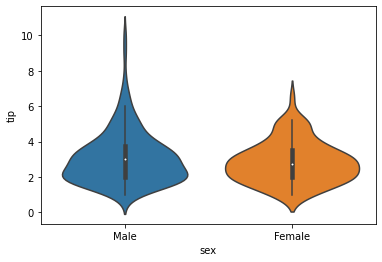

In [41]:
sns.violinplot(x='sex',y='tip',data=tips) # here we are taking x as a categorical data, y as numerical data

In [42]:
# the big difference between a box plot and a violin plot is box plot is easier to understand whereas violin plot is a bit
# difficult one to understand by looking at it

<AxesSubplot:xlabel='sex', ylabel='tip'>

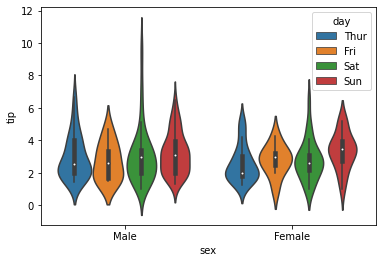

In [43]:
# we can also have hue with violin plot as well for extra layer of categorical distribution

# let's check

sns.violinplot(x='sex',y='tip',data=tips, hue='day')

<AxesSubplot:xlabel='day', ylabel='tip'>

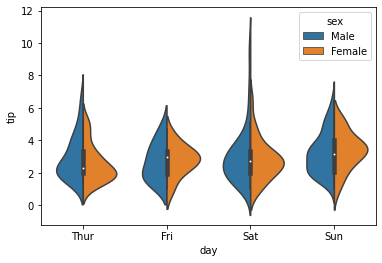

In [44]:
# notice here we are having 4 violins per gender we can have them in one violin also using the argument called split=True
# but for the split we need to have only 2 classes so we will do it in this way

sns.violinplot(x='day',y='tip',data=tips,hue='sex',split=True)

<AxesSubplot:xlabel='day', ylabel='tip'>

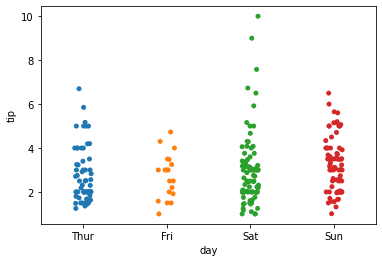

In [45]:
# we can also have strip plot which is basically similar to the box and violin plot like we will have one categorical and
# one numerical columns and we will be able to see the comparisions

sns.stripplot(x='day',y='tip',data=tips)

D:\Anaconda3.8\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='tip'>

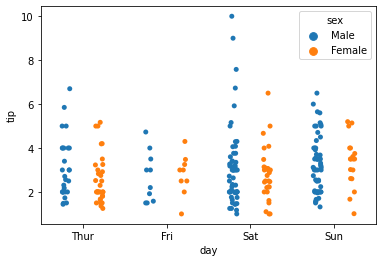

In [46]:
# we can also have hue and split like we had in box and violin plot

sns.stripplot(x='day',y='tip',data=tips,hue='sex',split=True)

D:\Anaconda3.8\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda3.8\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='tip'>

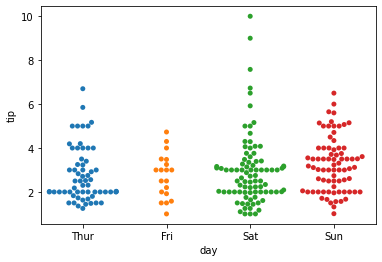

In [47]:
# we can also combine the violin plot and strip plot together and get a new plot named swarm plot which will showcase all
# the points

sns.swarmplot(x='day',y='tip',data=tips)

In [48]:
# the major disadvantage of swarm plot is that for very large datasets it will not be able to justfy the dustributions

D:\Anaconda3.8\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


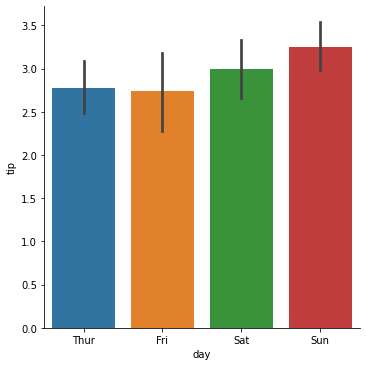

In [49]:
# now let's discuss about factor plot, the best thing about it is it has a kind argument in which we can specify the kind of
# plot we want

sns.factorplot(x='day',y='tip',data=tips,kind='bar')

<h3> Part - 2 </h3>

In [51]:
# matrix plots

In [53]:
# Let's load 2 datasets

tips=sns.load_dataset('tips')
flight=sns.load_dataset('flights')

In [54]:
# now let's check out the datasets

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
flight.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [57]:
# now let's discuss about matrix plot

In [58]:
# In order to draw a matrix plot the data should be in matrix form. 
# so the matrix form is when we have the column and row names same means we have the comparision between each columns

In [59]:
# what I mean by that is if we find the corelation then

tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [60]:
# This form is the matrix form

In [61]:
# so we can save the corelation value in a variable

tc=tips.corr()

<AxesSubplot:>

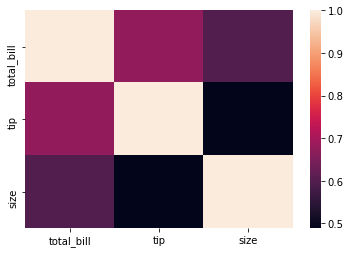

In [62]:
# now let's draw the heat map

sns.heatmap(tc)

In [63]:
# here we can see that it colors the columns data based on their corelation value

tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [64]:
# the diagonal is 1, then rest all are adjusted in color shades based on their values

<AxesSubplot:>

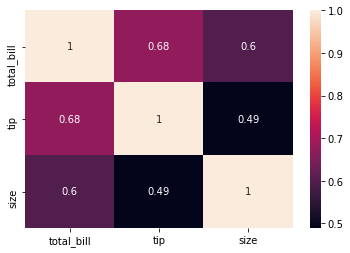

In [65]:
# we can also pass in the annotation or the corelation values of each color boxes

sns.heatmap(tc,annot=True)

In [70]:
# now let's make the flight data into matrix form

# for that let's create pivot table

fl=flight.pivot_table(index='month',columns='year', values='passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

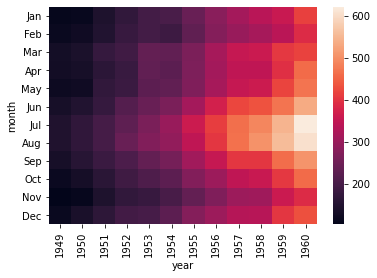

In [71]:
sns.heatmap(fl)

In [72]:
# we can also specify some line colors which will distringuish the border lines of each square and then the line width
# which will make the line thicker

<AxesSubplot:xlabel='year', ylabel='month'>

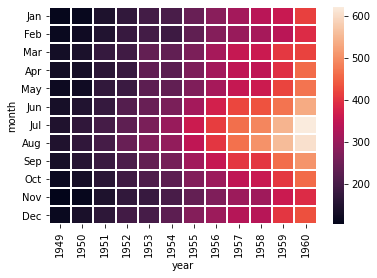

In [73]:
sns.heatmap(fl,linecolor='white',linewidth=1)

In [74]:
# so this is more easier to read and understand

In [75]:
# now let's discuss about the grids

# In grids we can automate the subplots based on the features of a dataframe

In [76]:
iris=sns.load_dataset('iris')

In [77]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


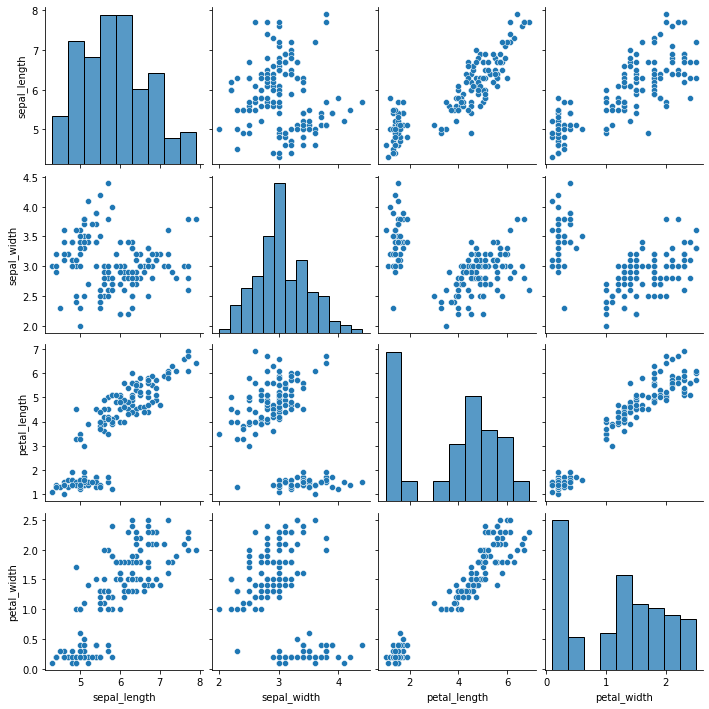

In [78]:
# now let's create a pair plot ouyt of the dataset

sns.pairplot(iris)

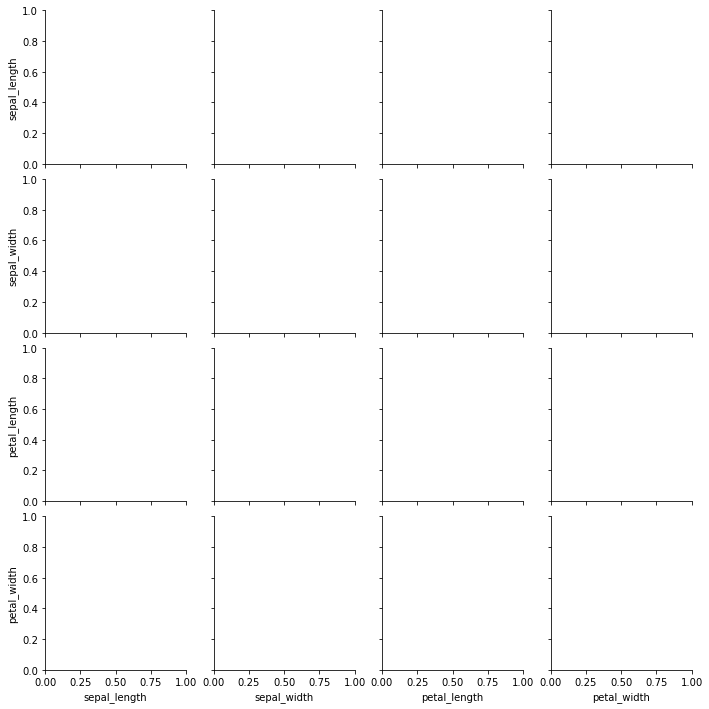

In [79]:
# now let's create a grid plot named PairGrid

sns.PairGrid(iris)

In [80]:
# notice that here it gives us the blank subplots of all the numerical columns comparision, we can make our own plots based
# on our preferences

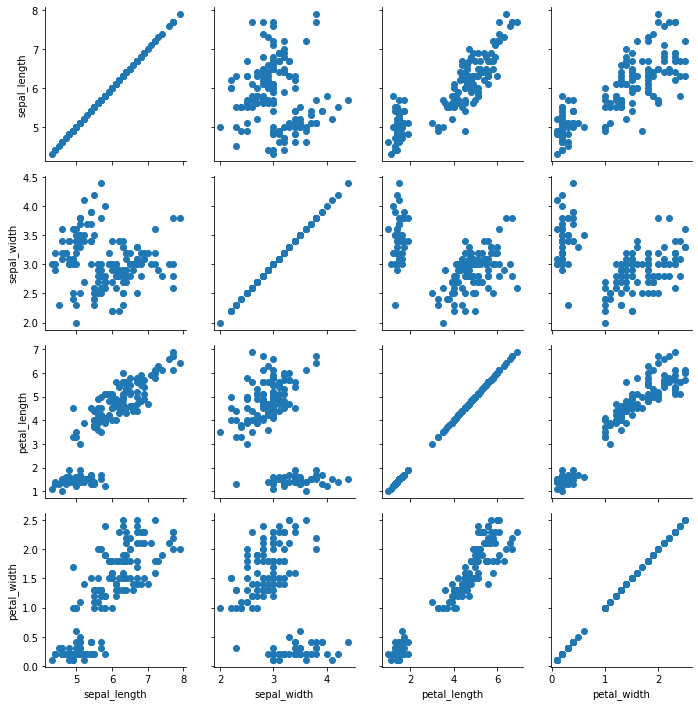

In [81]:
g=sns.PairGrid(iris) # let's save it in a variable g

# now we can plot
g.map(plt.scatter) # if we want to have scatter plot we can specify insed the brackets of map()

In [82]:
# And it will provide us the scatter plot comparision

D:\Anaconda3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
 

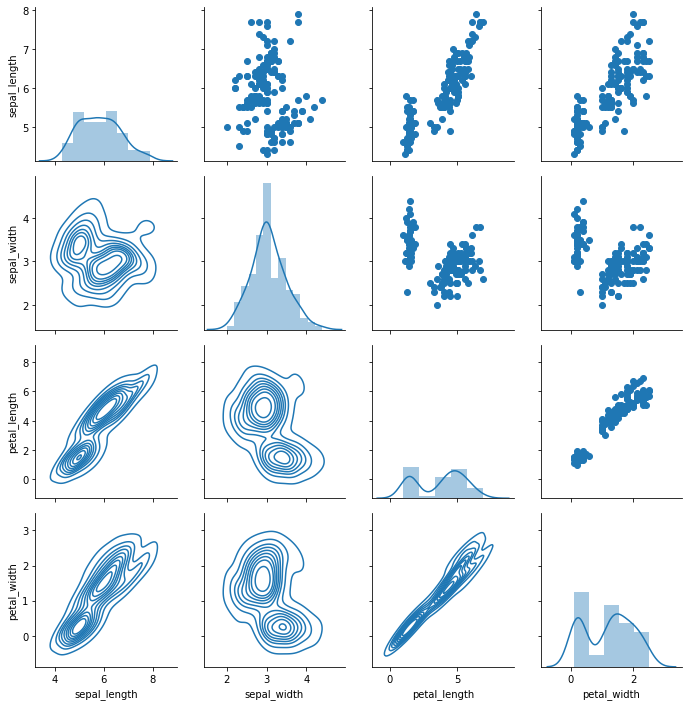

In [87]:
# we can have our different preferences as per our requirements

# for example:

g=sns.PairGrid(iris)

g.map_diag(sns.distplot) # distplot for the diagnals
g.map_upper(plt.scatter) # for the upper
g.map_lower(sns.kdeplot) # for the lower

In [88]:
# now let's discuss about lm plot

# lm plot we will mostly be using in our machine learning lenear models, but now we will check it out based on the data
# for ploting

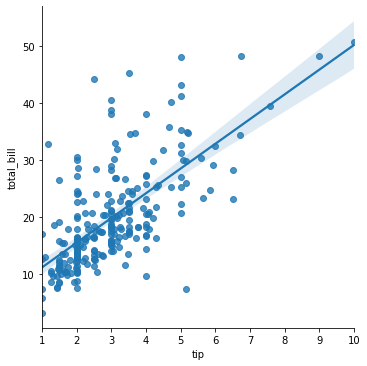

In [89]:
sns.lmplot(x='tip',y='total_bill',data=tips) # here we have to specify the x-axis data, y-axis data and the dataset

In [90]:
# notice that here we have a scatter plot with a linear line drawn

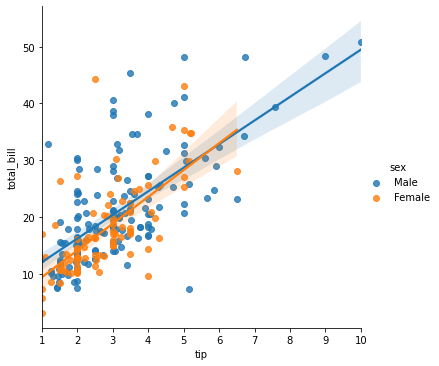

In [91]:
# we can also add the hue to it, let's say the hue is 'sex' column

sns.lmplot(x='tip',y='total_bill',data=tips,hue='sex')

In [92]:
# as you can see the male and feamale are separated by 2 different colors

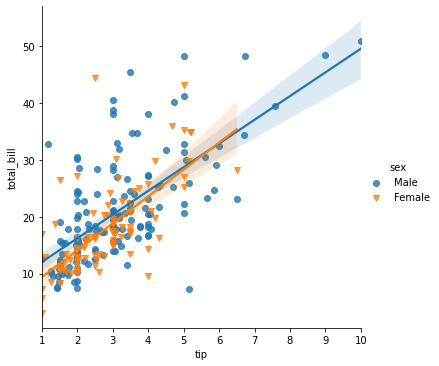

In [93]:
# we can add different markers to distinguish the male and female also, like

sns.lmplot(x='tip',y='total_bill',data=tips,hue='sex',markers=['o','v'])

In [94]:
# notice that all the female are marker as 'v' and all male are marked as 'o'

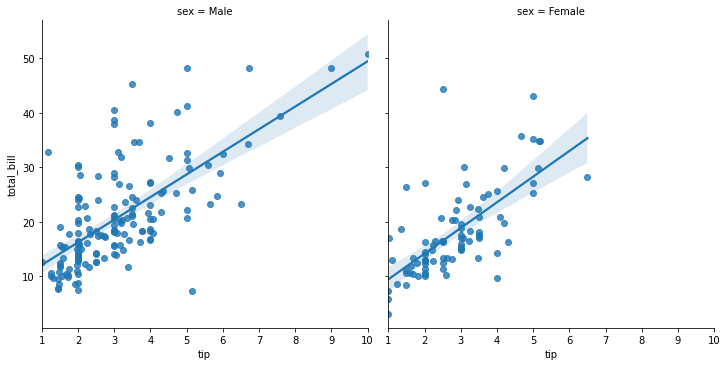

In [95]:
# we can also have 2 different plots separated by columns in lm plot

sns.lmplot(x='tip',y='total_bill',data=tips, col='sex') # here instead of hue we are using the argument col to
# have 2 different plots for the 'sex' column

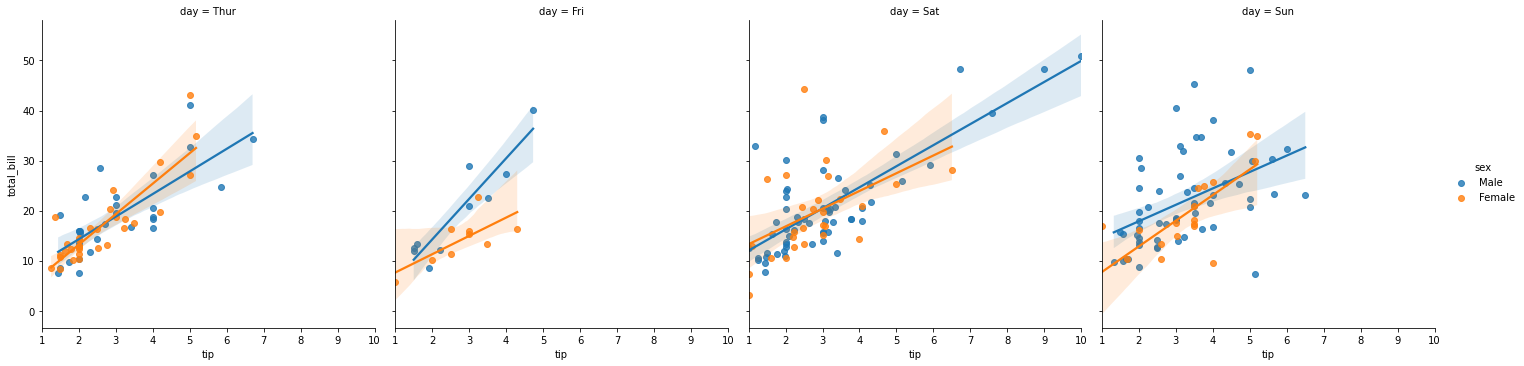

In [96]:
# we can also have the hue and the col argument together

sns.lmplot(x='tip',y='total_bill',data=tips, col='day', hue='sex')

In [97]:
# so here we will have 4 different plots one plot for each day and then each plot separated by the 'sex' column data